<a href="https://colab.research.google.com/github/FedericoMilanesio/Unito-NeuralNetworks/blob/main/notebooks/solved/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of working with data

*Tutors*:
-- Federico Milanesio: federico.milanesio@unito.it
-- Davide Pirovano: davide.pirovano@unito.it

Recommended textbooks:


*  Beginner: **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow** (Aurélien Géron)
* Intermediate: **Deep learning with Python** (François Chollet), **Deep learning with PyTorch** (Eli Stevens)
* Advanced: **Advanced deep learning with Python: design and implement advanced next-generation AI solutions using TensorFlow and Pytorch** (Ivan Vasilev)

**A NOTE ON EXERCISES**: Throughout the notebook, there is a series of exercises. Some will be completed in class, while the rest are left to your discretion and are  marked as *optional*. They are intended to help you develop a deeper understanding of the subject, so feel free to approach them as you see fit.


<div>
<img src="https://imgs.xkcd.com/comics/machine_learning.png" width="350"/>
</div>

# PyTorch

PyTorch is a deep-learning library for Python, developed by Facebook's AI Research Group. In 2022 Meta shifted management of the framework to the newly created **PyTorch Foundation** (under the supervision of the Linux Foundation).

Why PyTorch?

* It is easy to understand, learn and use
* It supports GPUs
* It support numerical optimization on
generic mathematical expressions and automatic gradient calculation

# Torch Tensors

In [1]:
import torch

Tensors in PyTorch are essential for performing efficient mathematical operations on large datasets. They can represent **matrices, vectors, scalars, or higher-dimensional arrays**, mirroring the functionality of numpy arrays. PyTorch provides a range of functions for working with these tensors, and they can seamlessly operate on both CPUs and GPUs.

In [2]:
x = torch.tensor([1,2,3], dtype = torch.float)

In [3]:
x

tensor([1., 2., 3.])

In [4]:
x.shape

torch.Size([3])

In [5]:
x[2] = 1.5
x

tensor([1.0000, 2.0000, 1.5000])

In [6]:
float(x[1])

2.0

In [7]:
A = torch.randn(4, 3)            # initializing a tensor of gaussian iid values
A

tensor([[-1.2660, -0.4816,  0.6285],
        [-1.2763, -0.7722,  1.6471],
        [ 1.0315, -0.5351,  1.5890],
        [-1.6878,  0.0554,  0.0070]])

In [8]:
A.t()                            # transposing A

tensor([[-1.2660, -1.2763,  1.0315, -1.6878],
        [-0.4816, -0.7722, -0.5351,  0.0554],
        [ 0.6285,  1.6471,  1.5890,  0.0070]])

In [9]:
b = torch.matmul(A, x)            # matrix multiplication
b

tensor([-1.2864, -0.3502,  2.3447, -1.5665])

In [10]:
torch.all(torch.matmul(A, x) == A @ x)      # another way to write matrix multiplication

tensor(True)

**Exercise 1:** given the matrices A and b below, find x such that Ax = b

In [11]:
A = [[1,3,1],
     [2,2,2],
     [3,1,1]]

b = [5,6,5]

In [12]:
A = torch.tensor(A, dtype = torch.float)
b = torch.tensor(b, dtype = torch.float)

In [13]:
x = torch.inverse(A) @ b

**Exercise 2:** Can you check that your solution is correct?



In [14]:
torch.all(A@x == b)

tensor(True)

# Linear Regression

Let's introduce a simple dataset

In [15]:
dataset = torch.tensor([[1,3],
                        [1.11, 3.06],
                        [1.2, 3.3],
                        [1.3, 3.4],
                        [1.43, 3.7],
                        [1.6, 3.5],
                        [1.8, 3.66],
                        [1.87, 3.82],
                        [2.1,4]], dtype = torch.float)

x = dataset[:,0]     # we select the first feature of all points
y = dataset[:,1]     # we select the second feature of all points

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

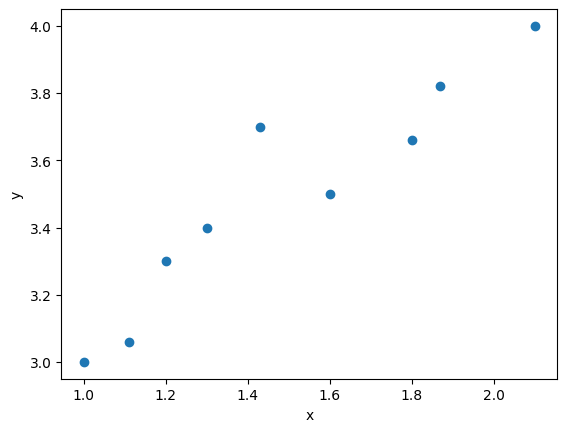

In [17]:
plt.scatter(x,y)

plt.xlabel("x")
plt.ylabel("y")

plt.show()

## Fitting with Exact Solution

Linear regression is the simplest machine learning algorithm. It is used to model the relationship between two variables: a dependent variable (y) and an independent variable (x). The goal is to find the best-fitting linear equation that describes the relationship between these variables. The "best" fit will be the line that minimizes the sum of squared residuals (the least-squares approach)

Given a loss functions defined as:

$ \mathcal{L} = \mathbb{E}[(y - ax - b)^2]$

The [optimal parameters](https://en.wikipedia.org/wiki/Simple_linear_regression) to minimize the loss are:

$ a = \dfrac{\sigma_{x,y}}{\sigma^2_x}$

$ b = \bar{y} - a \bar{x}$

In [18]:
covariance = (x.dot(y) / (y.shape[0]) - x.mean() * y.mean())

a =  covariance / x.var(correction = 0)                       # correction = 0 is used to divide by n and not n-1
b = y.mean() - a * x.mean()

a, b

(tensor(0.8415), tensor(2.2395))

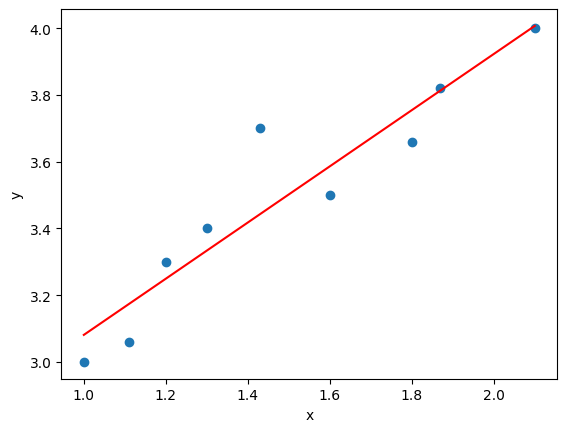

In [19]:
plt.scatter(x,y)
plt.plot(x, a*x + b, color = "red")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [20]:
best_mse = ((a*x + b - y)**2).mean()

In [21]:
best_mse

tensor(0.0121)

In [22]:
x.requires_grad = False

## Fitting with Gradient Descent

We will now use backpropagation to estimate $a$ and $b$

$ \dot a = - \mu \dfrac{\partial \mathcal{L}}{\partial a}$

$ \dot b = - \mu \dfrac{\partial \mathcal{L}}{\partial b}$

In [23]:
params = torch.zeros(2, requires_grad = True)
params

tensor([0., 0.], requires_grad=True)

In [24]:
print(params.grad)

None


In [25]:
def model(x, params):
  a, b = params                               # unpacks the array of parameters
  return x * a + b

In [26]:
def mse(y, y_pred):
  return ((y - y_pred)**2).mean()

Pytorch tensor store information on the chain of operations that generated them. This allows them to automatically generate the chain of derivatives with respect to all the inputs with the parameter `requires_grad` set to `True`. Below there is a quick schematic on how autograd works in our example

 <img src="https://drive.google.com/uc?export=view&id=1bEytAk6-tG0znyAlLMfsST4zysywBmQO" width="750" />

We can now write a learning algorithm

In [27]:
learning_rate = .01
losses = []                                      # array of losses
As = []                                          # array of all the parameters a
bs = []                                          # array of all the parameters b

for epoch in range(100):

  if params.grad is not None:
    params.grad.zero_()                          # gradient accumulates after each time .backward() is called, so we have to set it to 0 at each epoch

  y_predicted = model(x, params)
  loss = mse(y_predicted, y)
  loss.backward()                                # we compute the derivative of the loss with respect to the parameters

  As.append(float(params[0]))                    # we store in an array the values of a, b, and loss for each epoch
  bs.append(float(params[1]))
  losses.append(float(loss))

  with torch.no_grad():                          # we don't want to accumulate the gradient in this step
    params -= learning_rate * params.grad        # gradient step

In [28]:
print("a, b =", params, "\nLoss: ", losses[-1])

a, b = tensor([1.5560, 1.1289], requires_grad=True) 
Loss:  0.0785905122756958


We now plot the evolution of the loss throughout training

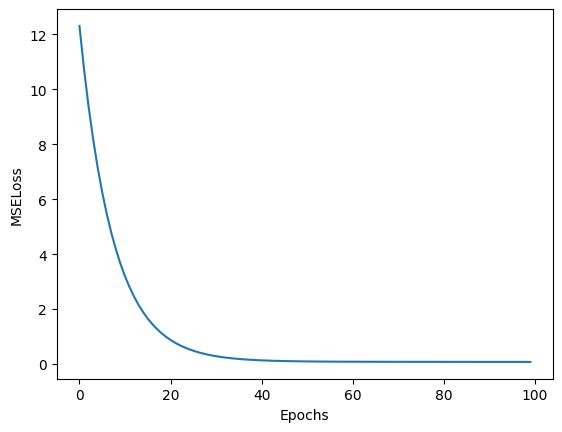

In [29]:
plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.show()

As we can see, the model is close the optimal solution:

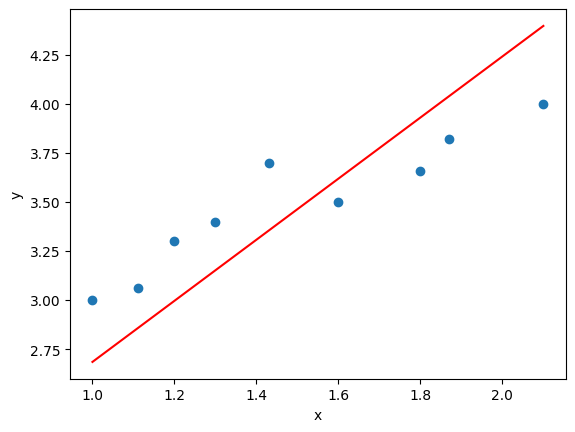

In [30]:
y_predicted = model(x, params).detach()      # we detach the values of a and b from their gradient

plt.scatter(x, y)
plt.plot(x, y_predicted, color = "red")

plt.xlabel("x")
plt.ylabel("y")

plt.show()


We can also see the evolution of the parameters in the a-b plane

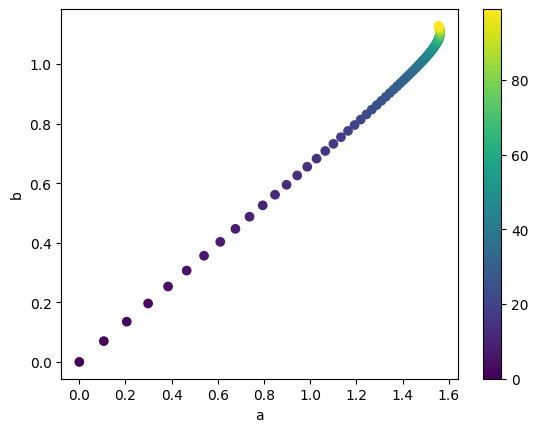

In [31]:
plt.scatter(As, bs, c = range(len(As)))     # c is a colormap, mapping each epoch to a different color (it's only a visual touch, not that important right now)

plt.xlabel("a")
plt.ylabel("b")
plt.colorbar()                              # this plots the bar on the right of the plot

plt.show()

**Exercise 3:** try fitting a different function to the same dataset

In [32]:
def model_trigonometric(x, params):
  a, b, c = params                               # unpacks the array of parameters
  return torch.sin(x) * a + torch.cos(x) * b + c

In [33]:
params = torch.zeros(3, requires_grad = True)

learning_rate = .01
losses = []                                      # array of losses
As = []                                          # array of all the parameters a
bs = []                                          # array of all the parameters b

for epoch in range(1000):

  if params.grad is not None:
    params.grad.zero_()                          # gradient accumulates after each time .backward() is called, so we have to set it to 0 at each epoch

  y_predicted = model_trigonometric(x, params)
  loss = mse(y_predicted, y)
  loss.backward()                                # we compute the derivative of the loss with respect to the parameters

  As.append(float(params[0]))                    # we store in an array the values of a, b, and loss for each epoch
  bs.append(float(params[1]))
  losses.append(float(loss))

  with torch.no_grad():                          # we don't want to accumulate the gradient in this step
    params -= learning_rate * params.grad        # gradient step

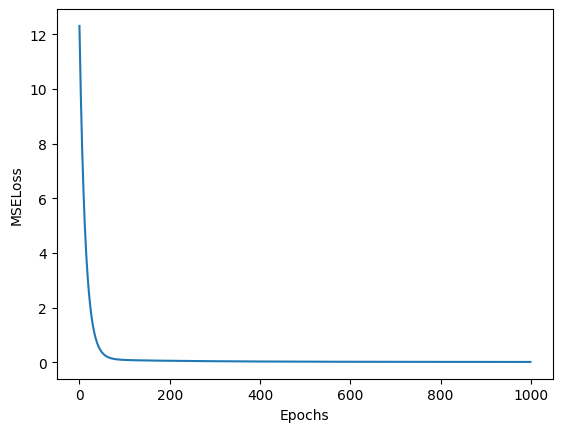

In [34]:
plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.show()

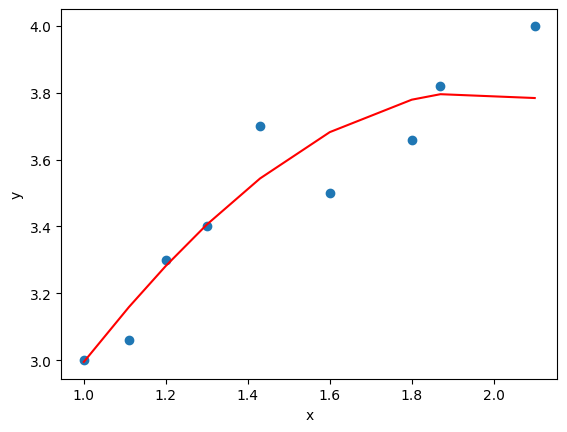

In [35]:
y_predicted = model_trigonometric(x, params).detach()      # we detach the values of a and b from their gradient

plt.scatter(x, y)
plt.plot(x, y_predicted, color = "red")

plt.xlabel("x")
plt.ylabel("y")

plt.show()


# Optimizing with Torch

PyTorch provides various optimization algorithms as part of the `torch.optim` module. This means you don't have to write the weight update, PyTorch will do it for you. Common optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, and more.

In [36]:
params = torch.tensor([0.0, 0.0], requires_grad=True)
learning_rate = 0.01

optimizer = torch.optim.SGD([params], lr=learning_rate)     # we initialize our optimizer,
                                                            # and we pass the parameters we want to optimize as a list of Torch tensors

                                                            # in this case sgd we will be full batched (so not very stochastic)
                                                            # we will see how to divide the dataset in batches next lesson

losses = []
EPOCHS = 4000

for epoch in range(EPOCHS):

  loss = mse(model(x, params), y)
  losses.append(float(loss))

  optimizer.zero_grad()   # setting gradients to zero
  loss.backward()         # computes the gradients
  optimizer.step()        # sgd step

In [37]:
params

tensor([0.8782, 2.1826], requires_grad=True)

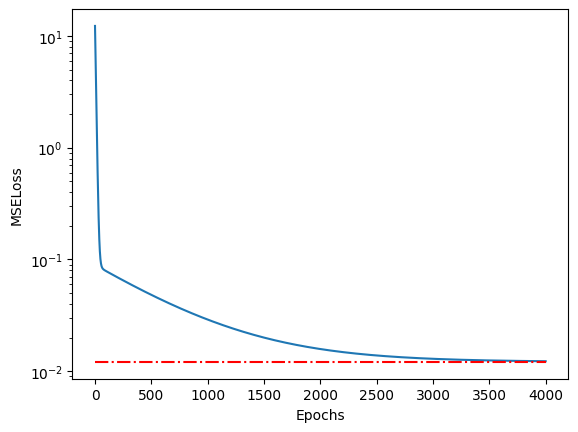

In [38]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.hlines(y=float(best_mse), xmin = 0, xmax = len(losses) + 1, color = "red", linestyles = "-.")

plt.yscale("log")

**Exercise 4:** try playing around with learning rates? Does it always converge to a solution?

No :(

In [39]:
params = torch.tensor([0.0, 0.0], requires_grad=True)
learning_rate = 0.304

optimizer = torch.optim.SGD([params], lr=learning_rate)     # we initialize our optimizer,
                                                            # and we pass the parameters we want to optimize as a list of Torch tensors

                                                            # in this case sgd we will be full batched (so not very stochastic)
                                                            # we will see how to divide the dataset in batches next lesson

losses = []
EPOCHS = 4000

for epoch in range(EPOCHS):

  loss = mse(model(x, params), y)
  losses.append(float(loss))

  optimizer.zero_grad()   # setting gradients to zero
  loss.backward()         # computes the gradients
  optimizer.step()        # sgd step

In [40]:
params

tensor([-3.9379e+19, -2.5423e+19], requires_grad=True)

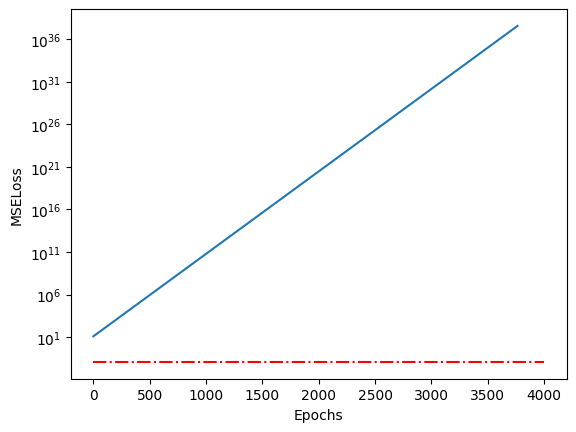

In [41]:
plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.hlines(y=float(best_mse), xmin = 0, xmax = len(losses) + 1, color = "red", linestyles = "-.")

plt.yscale("log")

# A Real Dataset

**Exercise 5:** try to implement a linear regression with this dataset (you can use gradient-based methods or the analytical solution)

In [42]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [43]:
# we import the diabetes dataset

X = torch.tensor(diabetes.data, dtype = torch.float)
y = torch.tensor(diabetes.target, dtype = torch.float)

y = y / y.max()

In [44]:
# HINT: what parametrs do you need for a linear regression?

def linear_regression(x, w, b):

  return X @ w + b

In [45]:
w = torch.zeros(X.shape[1], dtype = torch.float, requires_grad = True)
b = torch.zeros(1, dtype = torch.float, requires_grad = True)

learning_rate = 1e-2

EPOCHS = 100

optimizer =  torch.optim.SGD([w, b], lr=learning_rate)

losses = []

for epoch in range(EPOCHS):

  loss = mse(linear_regression(x, w, b), y)
  losses.append(float(loss))

  optimizer.zero_grad()   # setting gradients to zero
  loss.backward()         # computes the gradients
  optimizer.step()        # sgd step


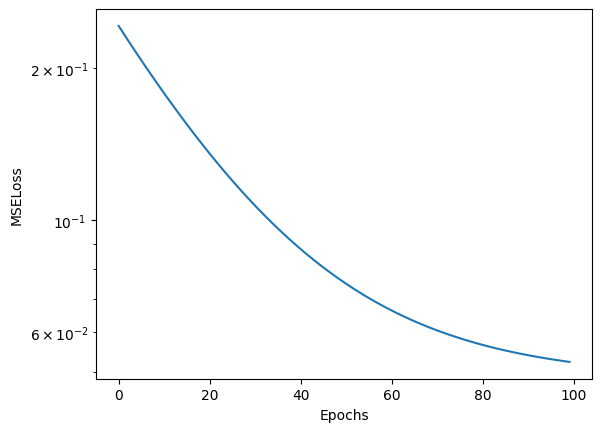

In [46]:
plt.plot(losses)

plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.yscale("log")

# A Neural Network from (almost) scratch

**Exercise 6 (optional):** try to implement a one hidden layer fully-connected neural network (without using torch.nn modules)

In [47]:
# we can define functions to use as activations

def sigmoid(x):

  return 1. / (1 + torch.exp(-x))

In [48]:
# we encapsulate all parameters and methods in a class


class NeuralNetwork():

  def __init__(self, input_size, hidden_size):

    self.input_size = input_size
    self.hidden_size = hidden_size

    #we now need to initialize all the parameters of our network

    self.w1 = torch.randn(size=(input_size, hidden_size), requires_grad = True)
    self.bias1 = torch.zeros(hidden_size, requires_grad = True)
    self.w2 = torch.randn(size=(hidden_size, 1), requires_grad = True)
    self.bias2 = torch.zeros(1, requires_grad = True)

  def parameters(self):

    #this method is used to pass all the model parameters to the optimizer

    return [self.w1, self.bias1, self.w2, self.bias2]

  def __call__(self, x):

    #this method is called when predicting some samples

    h = x @ self.w1 + self.bias1
    h = sigmoid(h)

    return h @ self.w2 + self.bias2

In [49]:
n_net = NeuralNetwork(input_size = X.shape[1], hidden_size = 3)

n_net(X[:10])

tensor([[0.5329],
        [0.5283],
        [0.5498],
        [0.5133],
        [0.5146],
        [0.4708],
        [0.5152],
        [0.5888],
        [0.5663],
        [0.5032]], grad_fn=<AddBackward0>)

In [50]:
learning_rate = 1e-2

EPOCHS = 100

optimizer = torch.optim.Adam(n_net.parameters(), lr=learning_rate)

losses = []

for epoch in range(EPOCHS):

  loss = mse(n_net(X), y)
  losses.append(float(loss))

  optimizer.zero_grad()   # setting gradients to zero
  loss.backward()         # computes the gradients
  optimizer.step()        # sgd step

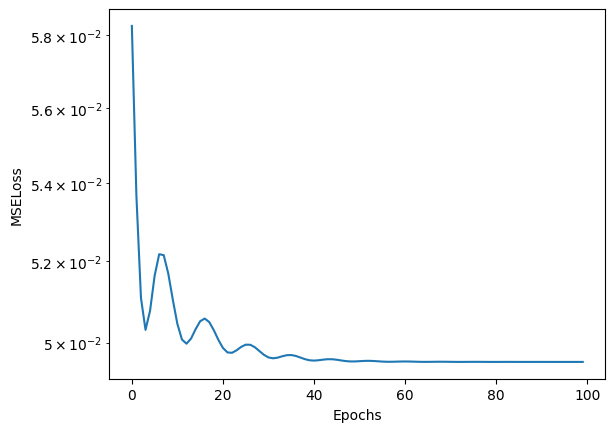

In [51]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSELoss")

plt.yscale("log")

*© 2024. This work is openly licensed via [CC BY-NC-SA 4.0 DEED](https://creativecommons.org/licenses/by-nc-sa/4.0/)*

*Comics used in the notebooks are from [xkcd.com](https://xkcd.com), and are licensed under the Creative Commons Attribution-NonCommercial 2.5 license.*

*Details and usage notes can be found at [xkcd.com/license.html](https://xkcd.com/license.html).*